In [1]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

#set_matplotlib_formats('pdf')

In [2]:
ref_photo = Table.read('/home/aalvarez/Work/Data/SC8/PHZPRD_D3_3_NOMINAL_20211006T095754-37VOZ8CE-20211006-095828-003/PhotoShiftedWithCorr.fits', hdu=1)
config = dict()
exec(open('/home/aalvarez/Work/Data/SC8/PHZPRD_D3_3_NOMINAL_20211006T095754-37VOZ8CE-20211006-095828-003/data/Nnpz-12Jul2021-111557.conf').read(), config)
ref_bands = config['reference_sample_phot_filters']

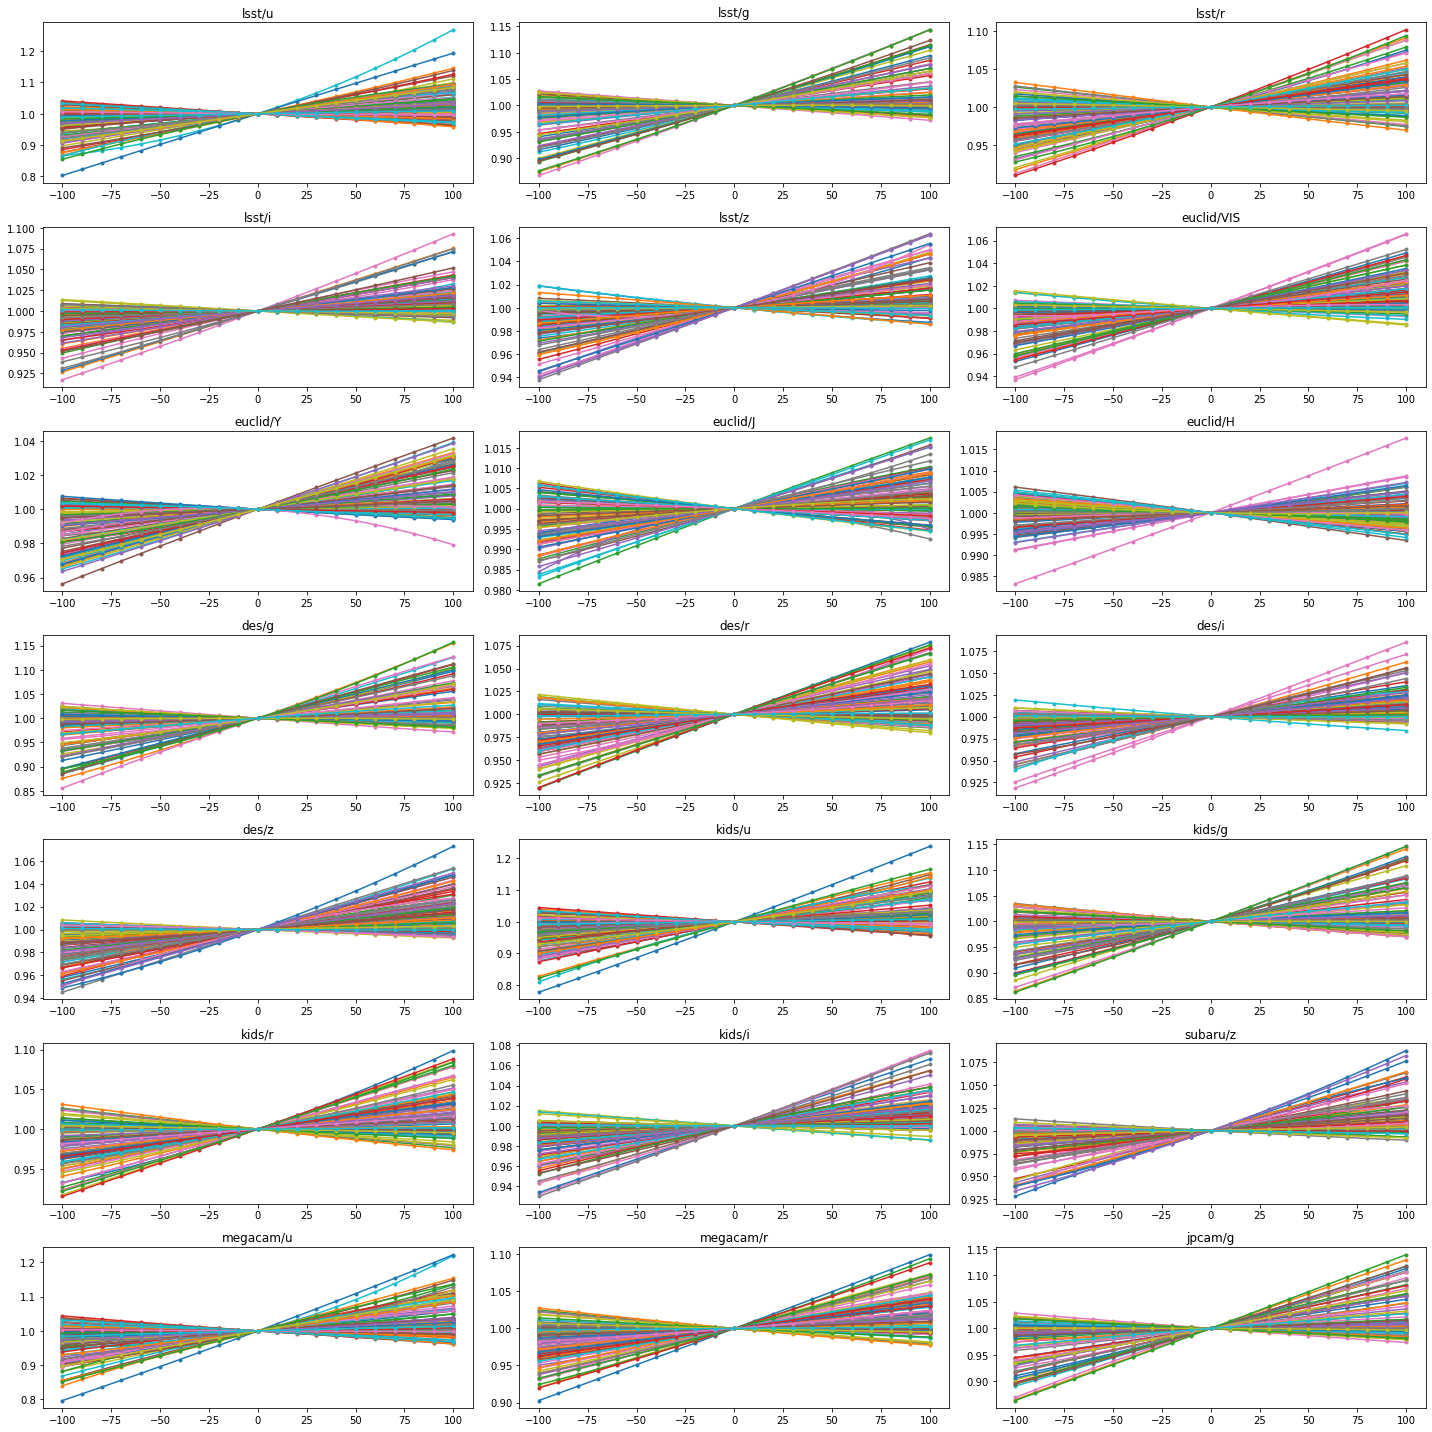

In [4]:
idxs = np.random.choice(len(ref_photo), 100)
shifts = np.linspace(-100, 100, 21)

fig, axes = plt.subplots(ncols=3, nrows=len(ref_bands)//3, figsize=(20, 20))
for i, ax in enumerate(axes.ravel()):
    b = ref_bands[i]
    ax.set_title(b)
    for idx in idxs:
        corr_a, corr_b = ref_photo[f'{b}_SHIFT_CORR'][idx]
        corr = corr_a * shifts * shifts + corr_b * shifts + 1
        ax.plot(shifts, corr, marker='.', label=ref_photo['ID'][idx])
    #if i == 0:
    #    ax.legend()
    
plt.tight_layout()